In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import struct
def readOVF(plik):
    f=open(plik,"rb")
    byte=f.read()
    ii=0
    t4=b''
    t8=b''
    while (t8!=b'@\xdew\x83!\x12\xdcB') & (t4!=b'8\xb4\x96I'):
        t8=byte[ii:(ii+8)]
        t4=byte[ii:(ii+4)]
        ii=ii+1
    words=byte[0:ii].decode().replace('\n',' ').split(' ')
    xns="xnodes:"
    yns="ynodes:"
    zns="znodes:"
    bins="Binary"
    xnn=[s+1 for s,v in enumerate(words) if v==xns]
    ynn=[s+1 for s,v in enumerate(words) if v==yns]
    znn=[s+1 for s,v in enumerate(words) if v==zns]
    binn=[s+1 for s,v in enumerate(words) if v==bins]
    xn=int(words[xnn[0]])
    yn=int(words[ynn[0]])
    zn=int(words[znn[0]])
    bn=int(words[binn[0]])
    if bn==4:
        dat=struct.unpack('f'*xn*yn*zn*3,byte[(ii+bn-1):(ii+bn-1+xn*yn*zn*bn*3)])
    if bn==8:
        dat=struct.unpack('d'*xn*yn*zn*3,byte[(ii+bn-1):(ii+bn-1+xn*yn*zn*bn*3)])   
    dat3=np.array(dat).reshape(zn,yn,xn,3)
    ms=np.sqrt(pow(dat3[0,0,0,0],2)+pow(dat3[0,0,0,1],2)+pow(dat3[0,0,0,2],2))
    return dat3/ms



In [4]:
tab=readOVF("1021-d6500-q600-01-final.omf")

In [5]:
np.shape(tab)

(1, 100, 100, 3)

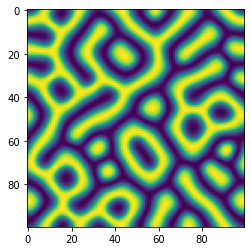

In [6]:
plt.imshow(tab[0,:,:,2])

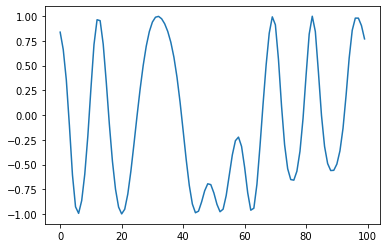

In [7]:
plt.plot(tab[0,50,:,2])

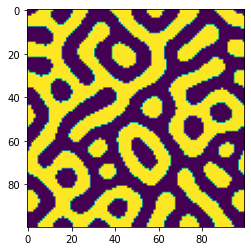

In [8]:
tab2=np.round(tab[0,:,:,2]/2+1/2)
plt.imshow(tab2)

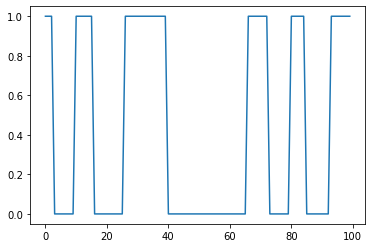

In [9]:
plt.plot(tab2[50])

In [10]:
ozn=np.zeros(np.shape(tab2))-1
ny,nx=np.shape(tab2)

In [11]:
# def oznacz(y,x,k):
#     if ozn[y,x]==-1 and tab2[y,x]==1:
#         ozn[y,x]=k
#         oznacz(min(ny-1,y+1),x,k)
#         oznacz(max(0,y-1),x,k)
#         oznacz(y,min(nx-1,x+1),k)
#         oznacz(y,max(0,x-1),k)

In [12]:
def oznacz(y,x,k):
    if ozn[y,x]==-1 and tab2[y,x]==0:
        ozn[y,x]=k
        oznacz((y+1)%ny,x,k)
        oznacz((y+ny-1)%ny,x,k)
        oznacz(y,(x+1)%nx,k)
        oznacz(y,(x+nx-1)%nx,k)

[[0.00e+00 1.00e+00 2.00e+00 3.00e+00 4.00e+00 5.00e+00 6.00e+00 7.00e+00
  8.00e+00]
 [3.81e+03 8.30e+01 7.04e+02 7.80e+01 7.10e+01 7.90e+01 1.01e+02 7.00e+01
  6.10e+01]]
[[  0.   1.   2.   3.   4.   5.   6.]
 [ 83.  78.  71.  79. 101.  70.  61.]]


(array([1., 0., 2., 0., 2., 1., 0., 0., 0., 1.]),
 array([ 61.,  65.,  69.,  73.,  77.,  81.,  85.,  89.,  93.,  97., 101.]),
 <BarContainer object of 10 artists>)

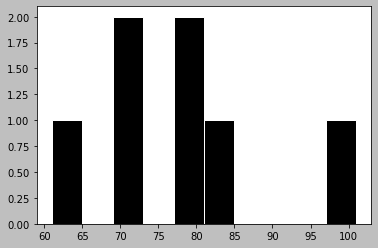

In [14]:
pixel=np.zeros((2,k))
for z in range(0,k+1):
    for y in range(len(tab2)):
        for x in range(len(tab2[y])):
            if ozn[x,y]==z:
                pixel[0,z]=z
                pixel[1,z]+=1
                
out_of_range_hist=200   
out_of_range_num=0

print(pixel)

pixel1=pixel

for x in range(k):
    y=pixel[1,x]
    if y>out_of_range_hist:
        out_of_range_num+=1
        pixel[1,x]=0
        
pixel2=np.zeros((2,k-out_of_range_num))
  
for x in range(k):
    if pixel[1,x]==0:
        for y in range(x,k-1):
            pixel1[1,y]=pixel[1,y+1]

for x in range(0,k-out_of_range_num):
    pixel2[0,x]=pixel1[0,x]
    pixel2[1,x]=pixel1[1,x]
  
print(pixel2)
         
plt.style.use('grayscale')
plt.hist(pixel2[1,:], bins=10, edgecolor="white")

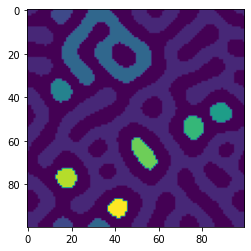

In [20]:
plt.imshow(ozn)

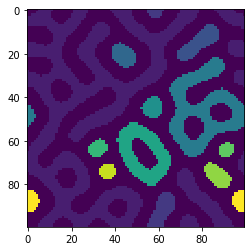

In [99]:
plt.imshow(ozn)

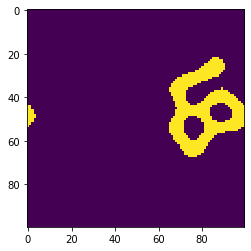

In [86]:
plt.imshow(ozn==4)

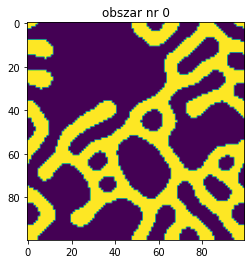

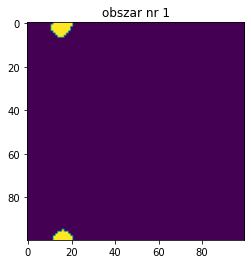

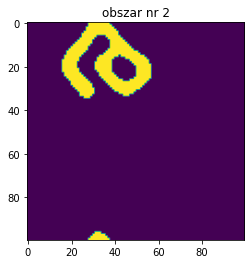

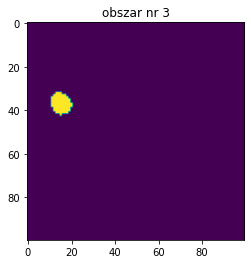

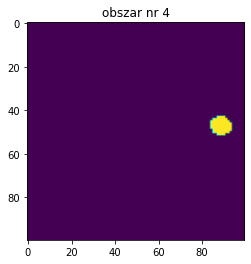

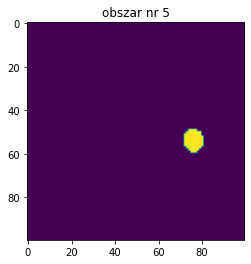

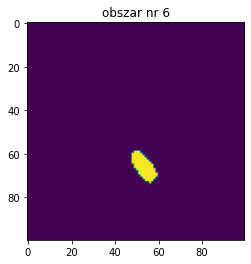

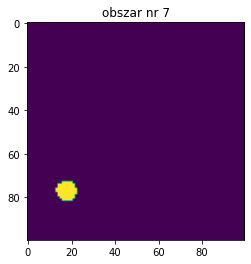

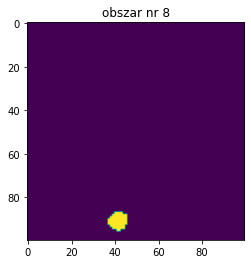

In [21]:
for i in range(k):
    plt.figure()
    plt.imshow(ozn==i)
    plt.title("obszar nr "+str(i))